# Homework 1: Gradient Descent & Friends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./real_estate.csv")
np.set_printoptions(suppress=True)

## Question 1 (Pre-processing)

### (a) Remove any rows of the data that contain a missing (‘NA’) value. List the indices of the removed data points. Then, delete all features from the dataset apart from: age, nearestMRT and nConvenience.

In [2]:
null_index = df[df.isnull().any(axis=1) == True].index
df.dropna(axis=0, inplace=True)
prices = df['price']
df.drop(columns=['transactiondate', 'latitude', 'longitude', 'price'], inplace=True)
# print(null_index)
# print(df.head)
print("null indices: " , null_index.values)

null indices:  [ 19  41 109 144 230 301]


### (b) normalisation and provide the mean value over your dataset

In [3]:
def pre_processing(x_data):
    x_max = x_data.max()
    x_min = x_data.min()
    for _ in range(x_data.size):
        _temp = (x_data[_] - x_min) / (x_max - x_min)
        x_data[_] = _temp
    return x_data

x_new_age = pre_processing(np.array(df['age']))
x_new_mrt = pre_processing(np.array(df['nearestMRT']))
x_new_nCon = pre_processing(np.array(df['nConvenience']))

x_new_age_mean = x_new_age.mean()
x_new_mrt_mean = x_new_mrt.mean()
x_new_nCon_mean = x_new_nCon.mean()

print("x_new_age_mean: ", x_new_age_mean)
print("x_new_nearestMRT_mean: ", x_new_mrt_mean)
print("x_new_nConvenience_mean: ", x_new_nCon_mean)

x_new_age_mean:  0.40607932670785213
x_new_nearestMRT_mean:  0.16264267697310722
x_new_nConvenience_mean:  0.4120098039215686


## Question 2 (Train and Test sets)

### ﬁrst half of observations to create trainning set, remaining half for test set

In [4]:
x_new = pd.DataFrame(columns=['age', 'nearestMRT', 'nConvenience'])
x_new['age'] = x_new_age
x_new['nearestMRT'] = x_new_mrt
x_new['nConvenience'] = x_new_nCon
size = x_new.index.size
training_price = prices.values[:int(size / 2)]
test_price = prices.values[int(size / 2):]
training_set = x_new.values[:int(size / 2)]
test_set = x_new.values[int(size / 2):]

### Print out the ﬁrst and last rows of both your training and test sets

In [5]:
x_print = pd.DataFrame(columns=['age', 'nearestMRT', 'nConvenience', 'price'])
x_print['age'] = x_new_age
x_print['nearestMRT'] = x_new_mrt
x_print['nConvenience'] = x_new_nCon
x_print['price'] = prices.values

training_print = x_print.values[:int(size / 2)]
test_print = x_print.values[int(size / 2):]

first_training_row = training_print[0]
last_training_row = training_print[-1]
first_test_row = test_print[0]
last_test_row = test_print[-1]

print("first training row: ", first_training_row)
print("last training row: ", last_training_row)
print("first test row: ", first_test_row)
print("last test row: ", last_test_row)

first training row:  [ 0.73059361  0.00951267  1.         37.9       ]
last training row:  [ 0.87899543  0.09926012  0.3        34.2       ]
first test row:  [ 0.26255708  0.20677973  0.1        26.2       ]
last test row:  [ 0.14840183  0.0103754   0.9        63.9       ]


## Question 3(Loss Function)

![](./01.jpg)
![](./02.jpg)

## Question 4 (Gradient Descent Psuedocode)

### gradient descent updates

```python
for i <- 0 to nIteration:
    derivate_sum <- 0
    for j <- 0 to tranning_set_size:
        derivate_sum += loss_function_derivate
    derivate_loss_mean <- derivate_sum / tranning_set_size
    
    w <- w - learning_rate * derivate_loss_mean
```

### stochastic gradient descent updates

### stochastic gradient descent updates

```python
for i <- 0 to nIteration:
    for epoch <- 0 to epoch_times:
        w = w - learning_rate * loss_function_derivate
```

## Question 5 (Gradient Descent Implementation)

### helper function

In [6]:
def gradient_update(_X_k_i, w_t, training_values, prices_values, _size):
    _sum_gd = 0
    for _i in range(_size):
        wX = np.dot(w_t, training_values[_i])
        _sum_gd += ((_X_k_i * (wX - prices_values[_i])) / (2 * np.sqrt((wX - prices_values[_i]) ** 2 + 1)))
    return _sum_gd / _size


def loss_achieved(w_t, training_values, prices_values, _size, hyper):
    _sum_loss = 0
    for _i in range(_size):
        wX = np.dot(w_t.T, training_values[_i])
        _sum_loss += (np.sqrt(1 / (hyper ** 2) * (prices_values[_i] - wX) ** 2 + 1) - 1)
    return _sum_loss / _size

### (a) Generate a 3×3 grid of plots showing performance for each step-size.

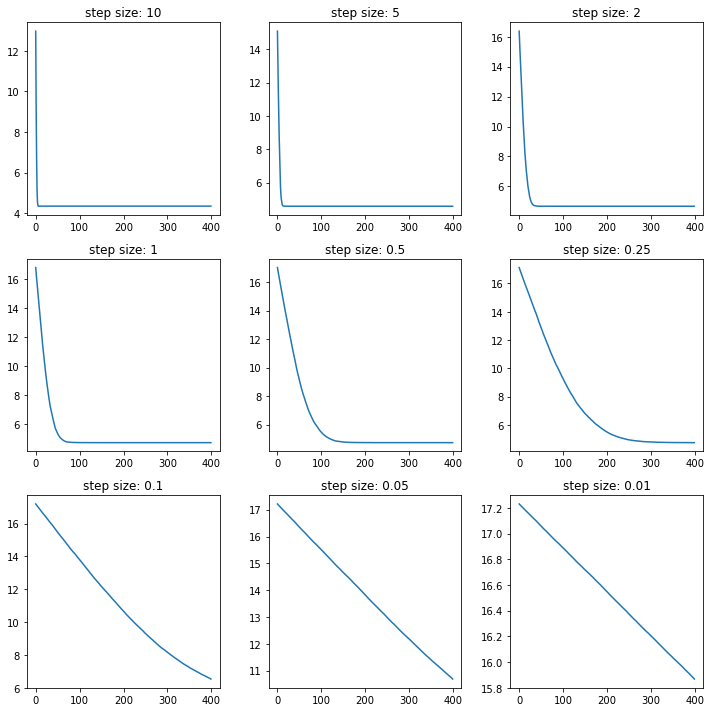

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
nIter = 400
alphas = [10, 5, 2, 1, 0.5, 0.25, 0.1, 0.05, 0.01]
losses = []
training_size = training_set.shape[0]
training_gd_set = np.insert(training_set, 0, 1, axis=1)
c = 2
loss = []
w_plot = []
for i, ax in enumerate(ax.flat):
    w = np.ones(4)
    for index in range(nIter):
        temp = index
        if temp >= training_size:
            temp -= training_size
        w = w - gradient_update(training_gd_set[temp], w, training_gd_set, training_price, training_size) * alphas[i]
        loss_mean = loss_achieved(w, training_gd_set, training_price, training_size, c)
        loss.append(loss_mean)
    losses.append(loss)
    ax.plot(losses[i])
    loss.clear()
    ax.set_title(f"step size: {alphas[i]}")

plt.tight_layout()
plt.show()

### (b) choose an appropriate step size (and state your choice), and explain why you made this choice.

I will choose **step size = 0.5**, for `0.1`, it is more stable and it does not fast to get the lowest loss.

### (c) plot the progression of each of the four weights over the iterations, run your model on the train and test set, and print the achieved losses.

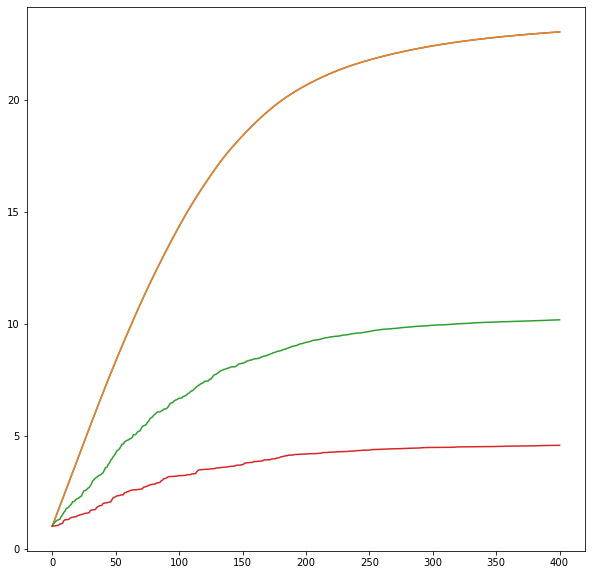

w0:  23.022722678965167
w1:  23.022722678965167
w2:  10.192369050047924
w3:  4.597963020259536
batch training loss:  6.097840919924557
batch test_loss:  5.516429121702068


In [8]:
w_plot.clear()
fig, ax = plt.subplots(figsize=(10, 10))
w = np.ones(4)
w_plot.append(w)
for index in range(nIter):
    temp = index
    if temp >= training_size:
        temp -= training_size
    Xki = np.array([1, training_gd_set[temp][0], training_gd_set[temp][1], training_gd_set[temp][2]])
    w = w - gradient_update(Xki, w, training_gd_set, training_price, training_size) * 0.3
    w_plot.append(w)
ax.plot(w_plot)
plt.show()

print("w0: ", w[0])
print("w1: ", w[1])
print("w2: ", w[2])
print("w3: ", w[3])

test_size = test_set.shape[0]
test_set_gd_set = np.insert(test_set, 0, 1, axis=1)
test_loss = loss_achieved(w, test_set_gd_set, test_price, test_size, c)
train_loss = loss_achieved(w, training_gd_set, training_price, training_size, c)
print("batch training loss: ", train_loss)
print("batch test_loss: ", test_loss)

## Question 6

### (a) plot Stochastic Gradient Descent Implementation

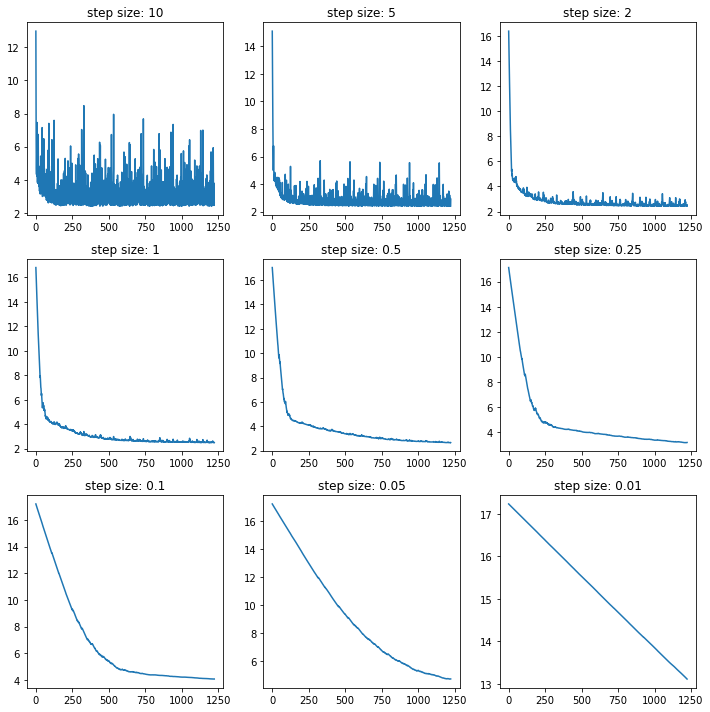

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
losses.clear()
loss.clear()
epoch_times = 6
for i, ax in enumerate(ax.flat):
    w = np.ones(4)
    for _ in range(epoch_times):
        for index in range(training_size):
            # Xki = np.array([1, training_gd_set[index][0], training_gd_set[index][1], training_gd_set[index][2]])
            Xki = np.array(training_gd_set[index])
            wX = np.dot(w, training_gd_set[index].T)
            derivative_loss = (wX - training_price[index]) / (2 * np.sqrt((wX - training_price[index]) ** 2 + 4))
            w = w - alphas[i] * derivative_loss * Xki
            loss_mean = loss_achieved(w, training_gd_set, training_price, training_size, c)
            loss.append(loss_mean)

    losses.append(loss)
    ax.plot(losses[i])
    loss.clear()
    ax.set_title(f"step size: {alphas[i]}")

plt.tight_layout()
plt.show()

### (b) choose an appropriate step size, explain why

I will choose **step size = 0.25**, it is more stable and it can achieve lower loss.

### (c) plot the progression of each of the four weights over the iterations, run your model on the train and test set, and record the achieved losses.

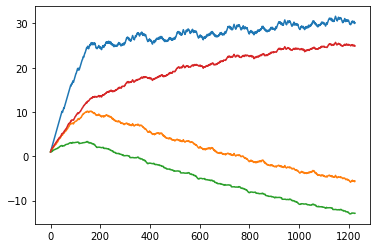

w0:  30.13206315742824
w1:  -5.58368145074438
w2:  -12.859753310061155
w3:  24.875357185884425
SGD train_loss:  2.780238696600798
SGD test_loss:  2.8448220512160347


In [10]:
helper = []
w = np.ones(4)
helper.append(w)
for _ in range(epoch_times):
    for index in range(training_size):
        Xki = np.array(training_gd_set[index])
        wX = np.dot(w, training_gd_set[index].T)
        derivative_loss = (wX - training_price[index]) / (2 * np.sqrt((wX - training_price[index]) ** 2 + 4))
        w = w - 0.4 * derivative_loss * Xki
        helper.append(w)

plt.plot(helper)
plt.show()

print("w0: ", w[0])
print("w1: ", w[1])
print("w2: ", w[2])
print("w3: ", w[3])

test_loss = loss_achieved(w, test_set_gd_set, test_price, test_size, c)
train_loss = loss_achieved(w, training_gd_set, training_price, training_size, c)
print("SGD train_loss: ", train_loss)
print("SGD test_loss: ", test_loss)

## Question7. Results Analysis

By adjusting different learning rate, we can get more stable and lower loss model. If we use a big learning rate, 
we may get a poor loss, however if we use a small learning rate, we need take more time to wait it to get the good loss.

Since GD need to get all sum and get the mean, it takes lots of time, however, sgd fix this problem.

SGD will frequently update gradient with a high varience causing fluctuation, therefore, GD has a smoother loss path than SGD.